In [1]:
import pandas as pd
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d


In [2]:




results_agri = pd.read_csv(
    "Scenario_no_agri_3540.csv",
    index_col=0,          # use first column as index
    parse_dates=True      # automatically parse as datetime if possible
)



results_CMIP = pd.read_csv(
    "Reference_CMIP_3540.csv",
    index_col=0,          # use first column as index
    parse_dates=True      # automatically parse as datetime if possible
)



In [3]:
from ewatercycle.observation.grdc import get_grdc_data

grdc_chatly = get_grdc_data(2817100,
                   '1900-01-01T00:00Z',
                   '2001-01-01T00:00Z',
                   data_home='/home/avandervee3/MSc_AralSea/book/thesis_projects/MSc/2025_Q1_AndreVanDerVeen_CEG/work_in_progress/Test_Aral/')

grdc_kerki = get_grdc_data(2617110,
                   '1900-01-01T00:00Z',
                   '2001-01-01T00:00Z',
                   data_home='/home/avandervee3/MSc_AralSea/book/thesis_projects/MSc/2025_Q1_AndreVanDerVeen_CEG/work_in_progress/Test_Aral/')





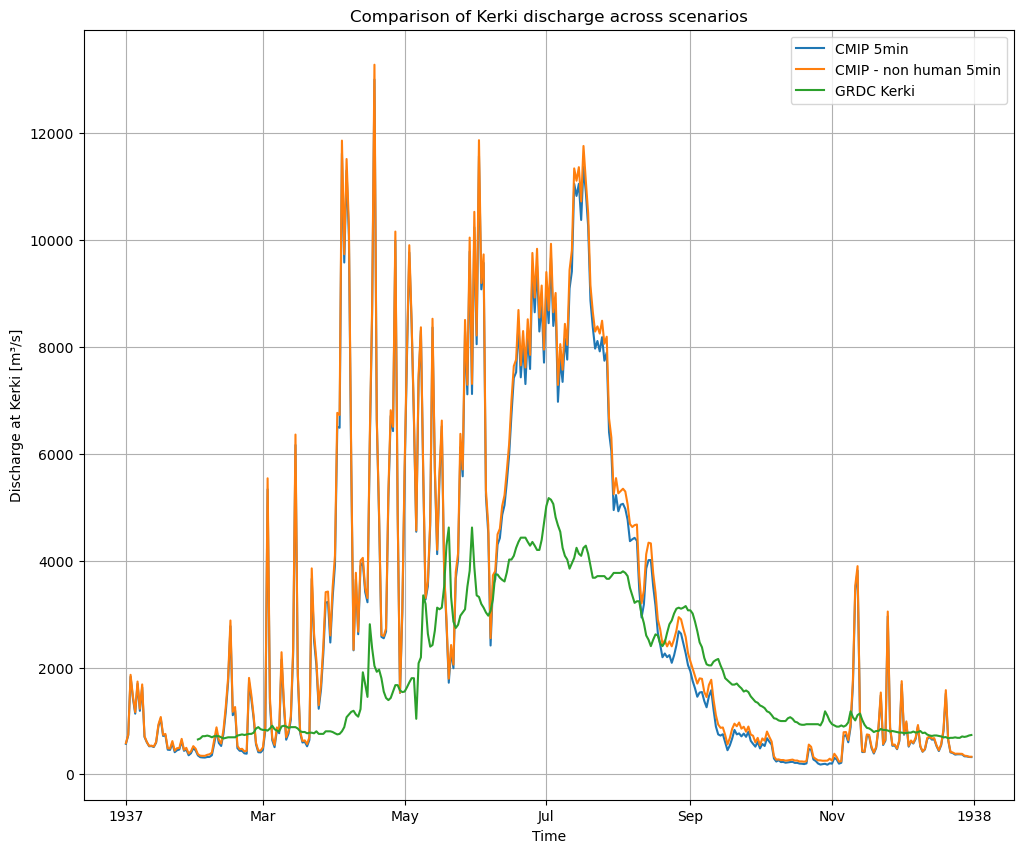

In [4]:
plt.figure(figsize=(12, 10))
plt.plot(results_CMIP.loc['1937']['Kerki'], label='CMIP 5min')
plt.plot(results_agri.loc['1937']['Kerki'], label='CMIP - non human 5min')
# plt.plot(results_agri.loc['1971']['Kerki'], label='No Agriculture scenario')
# plt.plot(results_kwave.loc['1971']['Kerki'], label='Kinematic Wave')

grdc_kerki['streamflow'].sel(time=slice('1937', '1937')).plot(label='GRDC Kerki')


plt.xlabel('Time')
plt.ylabel('Discharge at Kerki [m³/s]')
plt.title('Comparison of Kerki discharge across scenarios')
plt.legend()
#plt.xlim(0,365)
plt.grid(True)
plt.show()


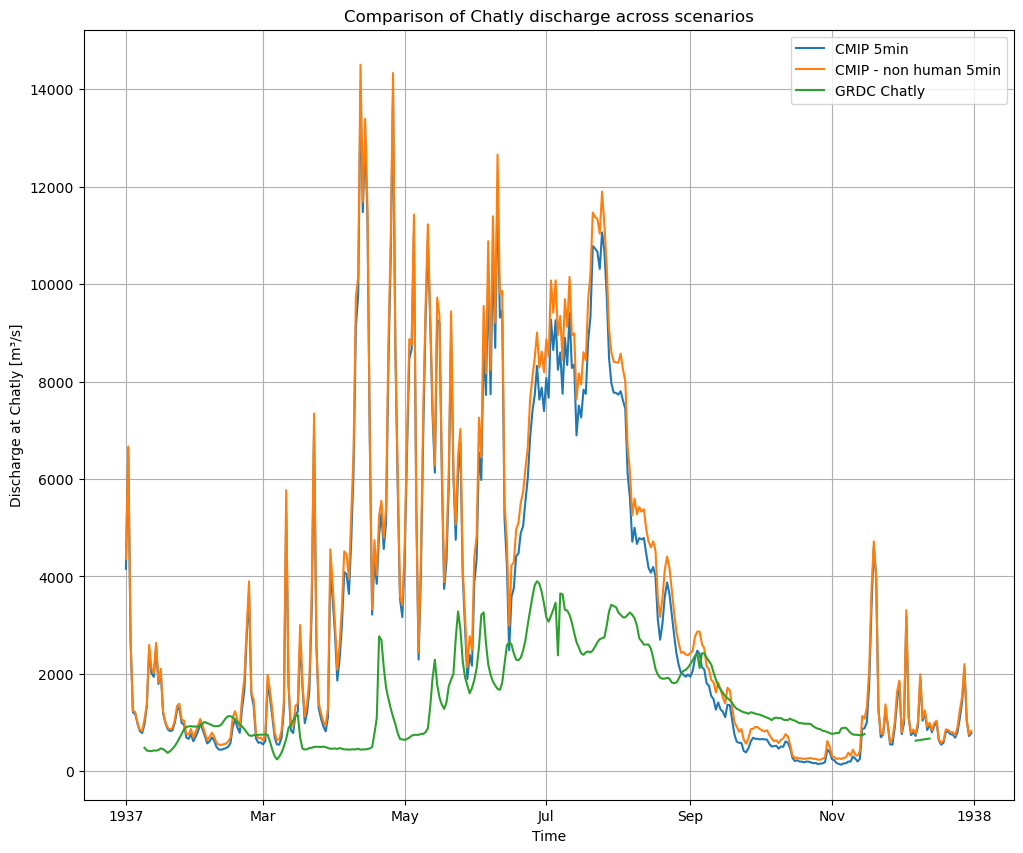

In [6]:
plt.figure(figsize=(12, 10))
plt.plot(results_CMIP.loc['1937']['Chatly'], label='CMIP 5min')
plt.plot(results_agri.loc['1937']['Chatly'], label='CMIP - non human 5min')

grdc_chatly['streamflow'].sel(time=slice('1937', '1937')).plot(label='GRDC Chatly')


plt.xlabel('Time')
plt.ylabel('Discharge at Chatly [m³/s]')
plt.title('Comparison of Chatly discharge across scenarios')
plt.legend()
#plt.xlim(0,365)
plt.grid(True)
plt.show()